In [1]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

# Merge monthly sales data into single file

In [2]:
jan = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

#Reading all files 
#sales19 = glob('Sales_Data/*.csv')
files = [file for file in os.listdir('./Sales_Data')]  
all_files = pd.DataFrame()

#Merging all files into one file
#df_sales19 = pd.concat([pd.read_csv(f, delimiter=',') for f in sales19])
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_files = pd.concat([all_files, df])

all_files.to_csv('allfiles.csv', index=False)    

## Read updated DataFrame

In [3]:
allfiles = pd.read_csv('allfiles.csv')
allfiles.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Process Clean Up

In [10]:
#Check for NaN Values
nan_df = allfiles[allfiles.isna().any(axis=1)]
nan_df.head()

#Drop NaNRows
allfiles = allfiles.dropna(how='all')

#Fix the "OR" error upon converting orderdate into Month
allfiles = allfiles[allfiles['Order Date'].str[0:2] !='Or']

#COnvert column values to correct type
allfiles['Quantity Ordered'] = pd.to_numeric(allfiles['Quantity Ordered'])
allfiles['Price Each'] = pd.to_numeric(allfiles['Price Each'])


# Add Extra Columns

In [5]:
#Add Month Column
allfiles['Month'] =allfiles['Order Date'].str[0:2]
allfiles['Month'] =allfiles['Month'].astype('int32')

#Add Sales($$$) Column
allfiles['Sales'] = allfiles['Quantity Ordered'].astype('int') * allfiles['Price Each'].astype('float')
allfiles.head()

#Add City Column
#Use apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

allfiles['City'] = allfiles['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
allfiles.head()

#Convert order date to object: manipulating as it is, str, may cause errors later for tracking purposes
#Add hour column
allfiles['Hour'] = pd.to_datetime(allfiles['Order Date']).dt.hour
allfiles['Minute'] = pd.to_datetime(allfiles['Order Date']).dt.minute
allfiles['Count'] = 1
allfiles.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


# What was the best month for sales? How much was earned that month?

In [6]:
sales_results = allfiles.groupby('Month').sum()

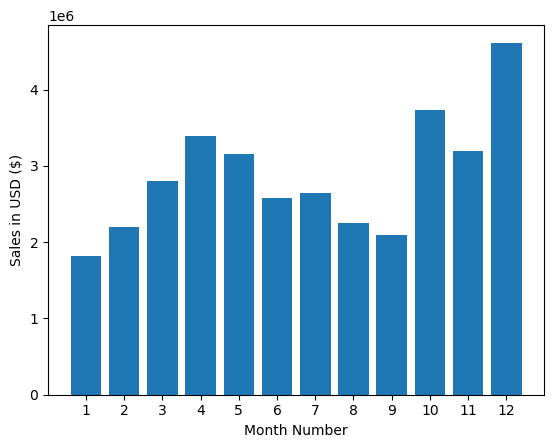

In [7]:
#Plot the results
months = range(1,13)

plt.bar(months,allfiles.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()


# What city made the most Sales?

In [12]:
prod_result = allfiles.groupby('City').sum()

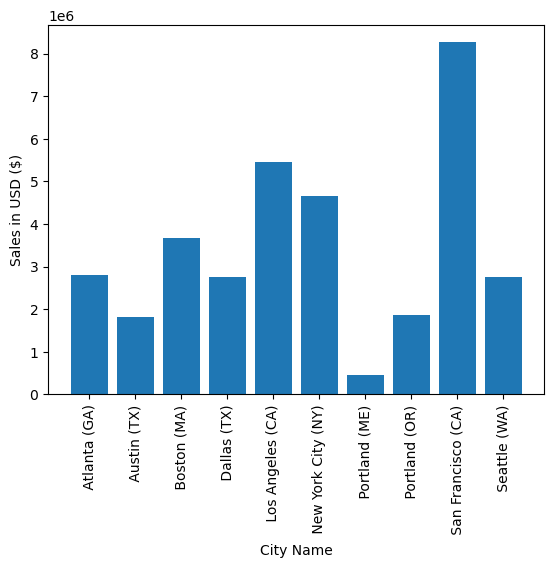

In [11]:
#plot the results
# Match Sales and Sales by City, using list comprehension
cities = [city for city, df in allfiles.groupby(['City'])]

plt.bar(cities, prod_result['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

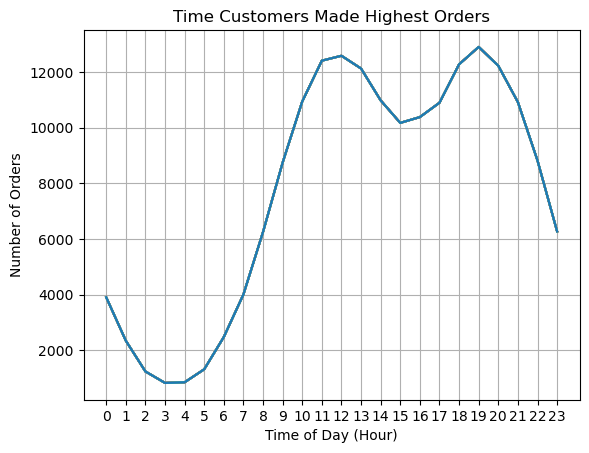

In [22]:
hours = [hour for hour, df in allfiles.groupby(['Hour'])]

plt.plot(hours, allfiles.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.title('Time Customers Made Highest Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Time of Day (Hour)')
plt.show()

## What products are most often sold together?

## What product sold the most? Why do you think it sold the most?